In [8]:
from os import path
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline

DATA_PATH=path.join('..','..','Parihaka')

LABEL_PATH=path.join(DATA_PATH, 'labels')
SEISMIC_PATH=path.join(DATA_PATH, 'png')
OUTPUT_PATH=path.join('..','images')

print(LABEL_PATH)
print(SEISMIC_PATH)

../../Parihaka/labels
../../Parihaka/png


In [9]:
inlines = [2300]

l image (438, 838, 4)
g image (351, 671)
rgb image (351, 671, 4)
(256, 256)
(256, 256, 4)
(256, 256)


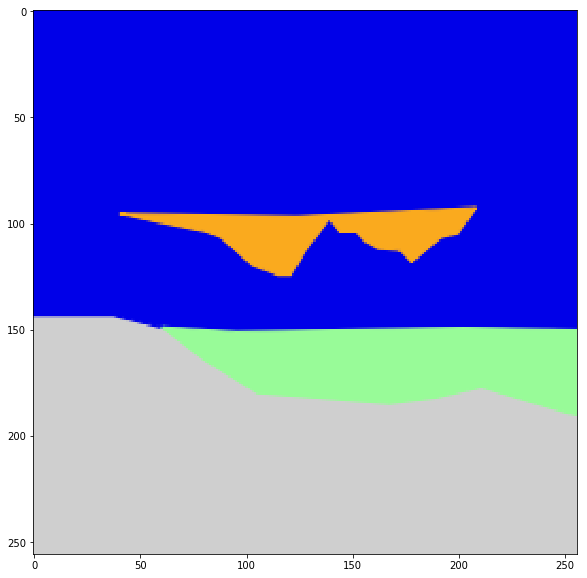

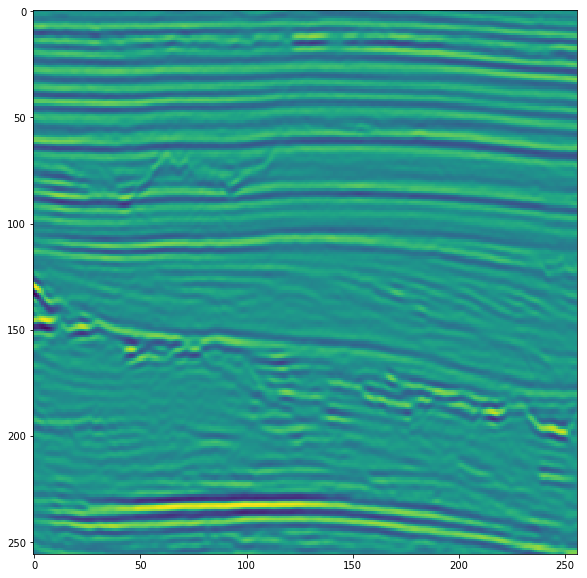

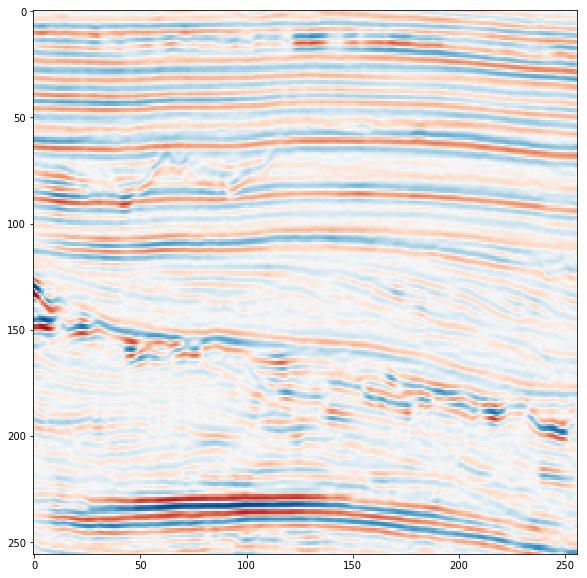

In [11]:
label_names = ['grey_il{}_segmentation.png'.format(il) for il in inlines]
rgb_names = ['rgb_il{}.png'.format(il) for il in inlines]
grey_names = ['grey_il{}.png'.format(il) for il in inlines]

gully_rgb_val = (250, 170, 30)

def crop_at(img, x,y):
    return img[y:y+256,x:x+256]

for g_name, rgb_name, l_name in zip(grey_names, rgb_names, label_names):
    l_image = misc.imread(path.abspath(path.join(LABEL_PATH, l_name)))
    g_image = misc.imread(path.abspath(path.join(SEISMIC_PATH, g_name)))
    rgb_image = misc.imread(path.abspath(path.join(SEISMIC_PATH, rgb_name)))
    print("l image", l_image.shape)
    print("g image", g_image.shape)
    print("rgb image", rgb_image.shape)
    
    y=50
    x=250
    
    grey_crop = g_image[y:y+256, x:x+256]
    rgb_crop = rgb_image[y:y+256, x:x+256, :]
    l_crop = l_image[y:y+256, x:x+256, :]
    
    grey_label_crop = np.zeros_like(l_crop[:,:,0])
    for i in range(l_crop.shape[0]):
        for j in range(l_crop.shape[1]):
            if np.all(l_crop[i,j,0:3] == gully_rgb_val):
                grey_label_crop[i,j] = 255
    
    

    print(grey_crop.shape)
    print(rgb_crop.shape)
    print(grey_label_crop.shape)
    
    misc.imsave(path.join(OUTPUT_PATH, 'grey_il2300.crop.png'), grey_crop)
    misc.imsave(path.join(OUTPUT_PATH, 'grey_label_il2300.crop.png'), grey_label_crop)
    misc.imsave(path.join(OUTPUT_PATH, 'rgb_il2300.crop.png'), rgb_crop)    
    
    plt.figure(figsize=(10,10))
    plt.imshow(l_crop)
    
    plt.figure(figsize=(10,10))
    plt.imshow(grey_crop)
    
    plt.figure(figsize=(10,10))
    plt.imshow(rgb_crop)
    